In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Read Datasets
df = pd.read_csv("fifa20.csv")
pd.set_option('display.max_columns',None)
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
df_p = df.copy()

## Data Exploration and Data Preparation

### Checking for Null Value
Ada 2 cara yang digunakan dalam penanganan nilai kosong :
 1. Penghapusan baris data jika pada suatu kolom memiliki nilai kosong yang tidak terlalu banyak.
 2. Pengubahan value jika suatu kolom memiliki nilai kosong yang banyak. Pengubahan ini dilakukan dengan asumsi yang dibuat sendiri. Dalam kasus ini, asumsi yang dibuat adalah mengubahnya menjadi 0 atau '0' karena data tersebut merupakan skill point dari pemain. Sehingga dapat diartikan bahwa pemain yang memiliki skill value NULL sama saja dengan tidak memiliki skill tersebut.

In [4]:
null_col = [
    'team_position',
]
df_p = df_p.dropna(subset=null_col)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
pace  =  1996
shooting  =  1996
passing  =  1996
dribbling  =  1996
defending  =  1996
physic  =  1996
gk_diving  =  16042
gk_handling  =  16042
gk_kicking  =  16042
gk_reflexes  =  16042
gk_speed  =  16042
gk_positioning  =  16042
player_traits  =  10588
ls  =  1996
st  =  1996
rs  =  1996
lw  =  1996
lf  =  1996
cf  =  1996
rf  =  1996
rw  =  1996
lam  =  1996
cam  =  1996
ram  =  1996
lm  =  1996
lcm  =  1996
cm  =  1996
rcm  =  1996
rm  =  1996
lwb  =  1996
ldm  =  1996
cdm  =  1996
rdm  =  1996
rwb  =  1996
lb  =  1996
lcb  =  1996
cb  =  1996
rcb  =  1996
rb  =  1996


In [5]:
#Replace Null Value

coloumns = [
    'dribbling',
    'pace',
    'shooting',
    'passing',
    'defending',
    'physic',
    'gk_diving',
    'gk_handling',
    'gk_kicking',
    'gk_reflexes',
    'gk_speed',
    'gk_positioning',
]

str_columns = [
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb'
]

for col in coloumns:
    df_p.loc[df_p[col].isnull(), col] = 0
    
for col in str_columns:
    df_p.loc[df_p[col].isnull(), col] = '0'
    
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
player_traits  =  10588


In [6]:
# delete feature

coloumns = [
    'age',
    'value_eur',
    'wage_eur',
    'international_reputation',
    'dob',
    'sofifa_id',
    'player_url',
    'long_name',
    'nationality',
    'club',
    'player_positions',
    'body_type',
    'real_face',
    'team_jersey_number',
    'contract_valid_until',
    'release_clause_eur',
    'player_tags',
    'loaned_from',
    'joined',
    'nation_position',
    'nation_jersey_number',
    'player_traits',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
]

for col in coloumns:
    df_p = df_p.drop(col, axis=1)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

### Feature Selection
Clustering kali ini akan mengelompokan data movement_sprint_speed, dan movement_agility. Digunakan untuk mengetahui kelompok pemain yang memiliki kecepatan dan kelincahan.

In [7]:
coloumns = [
    'movement_sprint_speed',
    'movement_agility',
]

df_k_means = pd.DataFrame()

for col in coloumns:
    df_k_means[col] = df_p[col]

In [8]:
df_k_means

,movement_sprint_speed,movement_agility
0,84,93
1,91,87
2,89,96
3,60,67
4,88,95
...,...,...
18273,58,45
18274,61,43
18275,54,52
18276,63,55


In [9]:
df_k_means = df_k_means.reset_index()

### Elbow Method
Digunakan untuk mengetahui jumlah centroid yang optimal yang harus di plot.

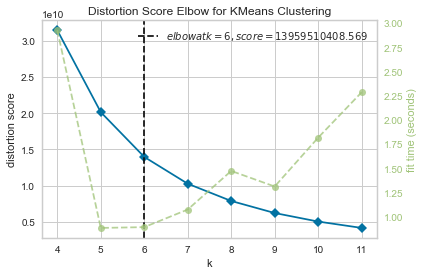

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df_k_means)
visualizer.show()

## Modeling
Modeling menggunakan algoritma K-Means. K-Means merupakan algoritma yang mengelompokan data berdasarkan jarak terhadap centroid.

In [11]:
k = 6
x = df_k_means["movement_sprint_speed"]
y = df_k_means["movement_agility"]
def initiate():    
    pointx = []
    pointy = []
    for i in range(k) :
        r = (np.random.randint(df_k_means.shape[0]))
        pointx.append(x[r])
        pointy.append(y[r])
    return(pointx, pointy)
print(initiate())

([58, 58, 72, 70, 71, 64], [63, 62, 77, 67, 77, 61])


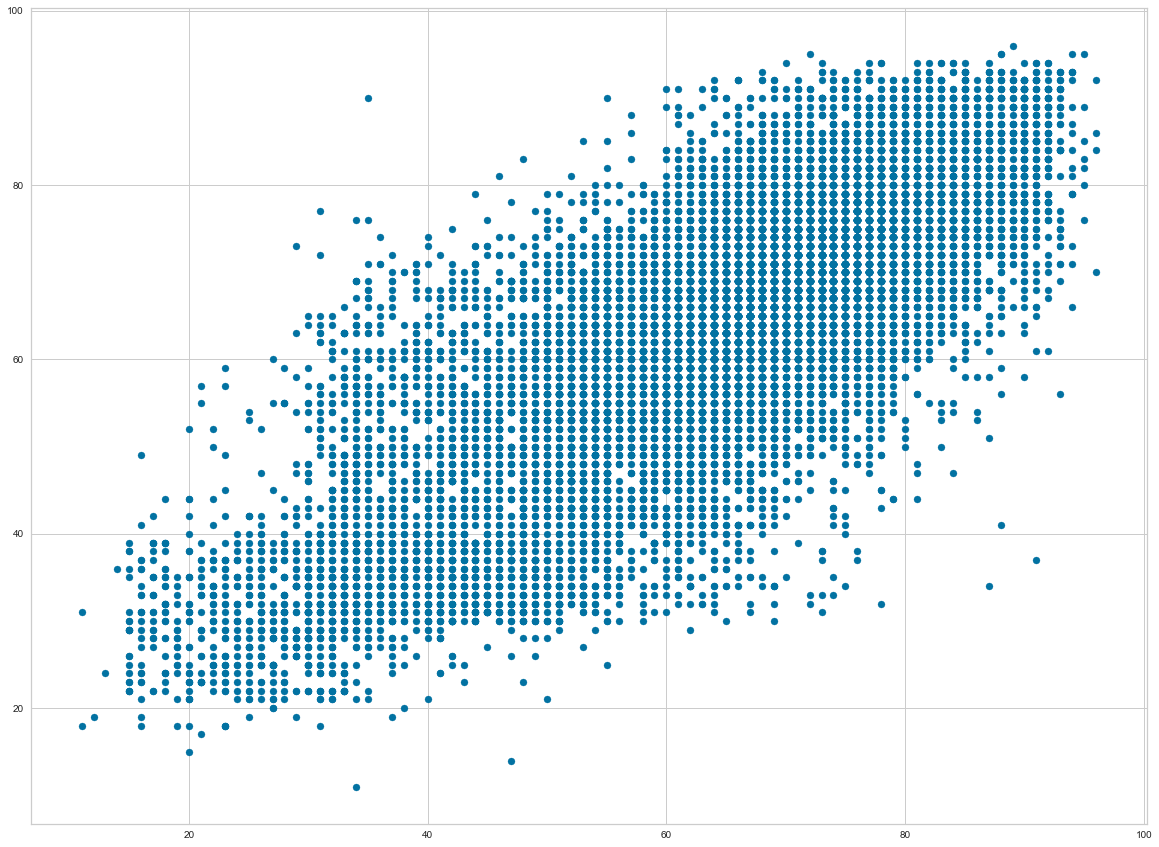

In [12]:
plt.figure(figsize=(20,15))
plt.scatter(x,y)

In [13]:
def dist_func(pointx,pointy):
    distance = []
    for i in range(df_k_means.shape[0]) :
        d = []
        for j in range(k) :
            dist = np.sqrt((pointx[j]-x[i])**2 + (pointy[j]-y[i])**2)
            d.append(dist)
        distance.append(d)
    return distance
# print(dist_func(pointx,pointy))

In [14]:
def min_func(distance):
    minimal = []
    for i in range(df_k_means.shape[0]):
        minimal.append(distance[i].index(min(distance[i])))
    return minimal
# print(min_func(dist_func(pointx, pointy)))

In [15]:
def new_centroid(minimal):
    pointx = []
    pointy = []
    for i in range(k):
        sumX = 0
        sumY = 0
        inc = 0
        for j in range(df_k_means.shape[0]):
            if minimal[j] == i:
                sumX += x[j]
                sumY += y[j]
                inc += 1
        if inc != 0 :
            pointx.append((sumX/inc))
            pointy.append((sumY/inc))
        if inc == 0:
            pointx.append(0)
            pointy.append(0)
    return pointx, pointy

# print(new_centroid(min_func(dist_func(pointx,pointy))))

In [16]:
init = initiate()
pointx = init[0]
pointy = init[1]
prepointx = []
prepointy = []
i = 1
while ((prepointx != pointx) or (prepointy != pointy)) :
    i += 1
    prepointx = pointx
    prepointy = pointy
    distance = dist_func(pointx,pointy)
    minimal = min_func(distance)
#     print(minimal)
    centroid = new_centroid(minimal)
#     print(centroid)
    pointx = centroid[0]
    pointy = centroid[1]
print(minimal)
print(centroid)

[3, 3, 3, 5, 3, 3, 1, 5, 3, 3, 3, 5, 0, 1, 4, 3, 5, 3, 0, 0, 3, 4, 3, 3, 3, 5, 3, 0, 4, 5, 1, 1, 5, 0, 0, 5, 4, 3, 3, 3, 5, 3, 5, 3, 0, 5, 0, 5, 3, 4, 5, 3, 3, 4, 3, 3, 0, 5, 0, 5, 4, 0, 0, 3, 0, 0, 3, 5, 3, 4, 0, 3, 3, 5, 4, 3, 0, 5, 5, 0, 0, 0, 3, 5, 5, 3, 5, 1, 1, 5, 0, 4, 3, 0, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 1, 0, 3, 2, 5, 3, 5, 4, 1, 4, 0, 5, 0, 0, 4, 4, 5, 3, 3, 0, 0, 5, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 5, 0, 5, 3, 3, 3, 0, 3, 0, 5, 0, 1, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 3, 0, 3, 4, 3, 5, 1, 3, 3, 3, 0, 1, 3, 0, 3, 1, 0, 3, 1, 3, 3, 4, 2, 4, 1, 1, 4, 0, 5, 0, 5, 3, 4, 4, 0, 0, 5, 4, 5, 0, 0, 4, 0, 4, 4, 1, 4, 3, 3, 3, 3, 0, 3, 1, 5, 0, 5, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 5, 0, 3, 5, 3, 4, 4, 5, 3, 3, 3, 3, 2, 0, 0, 5, 3, 5, 5, 4, 3, 3, 2, 4, 3, 0, 0, 1, 0, 0, 3, 0, 5, 0, 3, 4, 3, 0, 3, 3, 3, 5, 4, 5, 3, 4, 0, 4, 4, 2, 0, 4, 1, 3, 5, 3, 3, 3, 5, 0, 3, 3, 1, 0, 3, 5, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 5, 3, 2, 5, 3, 3, 3, 3, 0, 2, 0, 

In [17]:
df_final = pd.DataFrame()
df_final['movement_sprint_speed'] = x
df_final['movement_agility'] = y
df_final['cluster'] = minimal

<function matplotlib.pyplot.show(*args, **kw)>

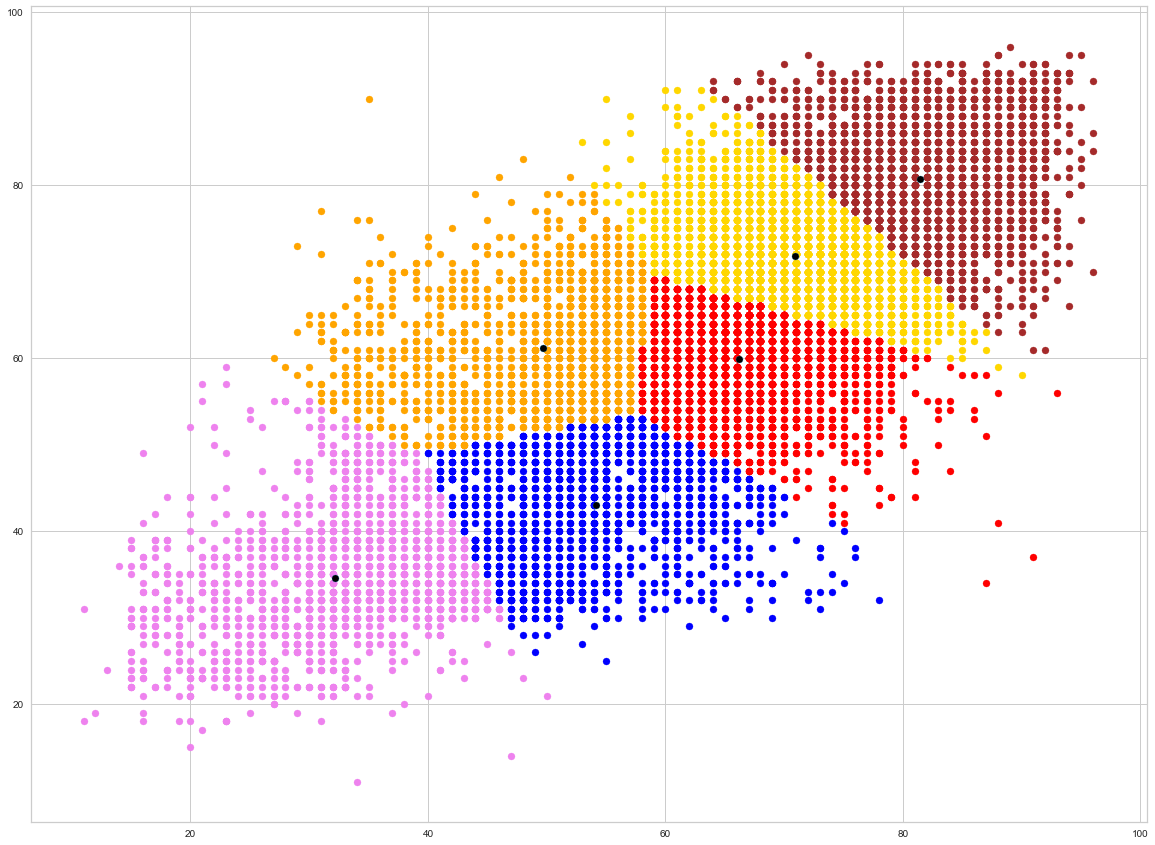

In [18]:
plt.figure(figsize=(20,15))
# arr_color = ['bo','ro','go','co','mo','yo','gold']
colors = ['gold', 'blue', 'violet', 'brown', 'orange', 'red', 'lime', 'cyan', 'orange', 'gray']


for i in range(k):
    plt.scatter(df_final[df_final['cluster'] == i].movement_sprint_speed,df_final[df_final['cluster'] == i].movement_agility, c=colors[i])

for i in range(k):
#     plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], 'rD', label="Fast")
    plt.scatter(centroid[0][i], centroid[1][i], c='black' ,edgecolors='b')

plt.show